## 0 - Import Packages ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 1 - Data Import ##

In [2]:
df = pd.read_csv("../datasets/cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

## 2 - Data preparation ##

### 2.1 - Changing dtypes ###

In [5]:
for col in list(df.select_dtypes(['object']).columns):
    df[col] = df[col].astype('category')

### 2.2 - X and y ###

In [6]:
X = df.drop('duration_listed', axis = 1)
y = pd.DataFrame(df['duration_listed'])

### 2.3 - Train and test ###

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### 2.4 - Scaling ###

#### 2.4.1 - Changing types to pandas.DataFrame ####

In [8]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

#### 2.4.2 - Separating categorical and numeric columns in train and test ####

In [31]:
numeric_columns=list(X_train.select_dtypes(['int64', 'float64']).columns)
categorical_columns=list(X_train.select_dtypes(['object', 'bool', 'category']).columns)
X_train_num = X_train.loc[:,numeric_columns]
X_train_cat = X_train.loc[:, categorical_columns]
X_test_num = X_test.loc[:,numeric_columns]
X_test_cat = X_test.loc[:, categorical_columns]

#### 2.4.3 - Fitting and applying Scaler ####

In [32]:
scaler = StandardScaler()
scaler.fit(X_train_num.values)

StandardScaler()

In [33]:
X_train_num_scaled = scaler.transform(X_train_num.values)
X_test_num_scaled = scaler.transform(X_test_num.values)

#### 2.4.4 - Re-joining categorical and scaled numeric data ####

In [34]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, index = X_train_num.index)
X_train_num_scaled.columns = X_train_num.columns
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, index = X_test_num.index)
X_test_num_scaled.columns = X_test_num.columns

In [35]:
X_train_scaled = pd.concat([X_train_num_scaled, X_train_cat], axis = 1)
X_test_scaled = pd.concat([X_test_num_scaled, X_test_cat], axis = 1)

In [36]:
X_train_scaled.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,manufacturer_name,model_name,transmission,color,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
10709,-0.260669,0.626088,-0.082522,0.239408,0.390342,0.163986,Ford,Mondeo,mechanical,silver,...,False,True,True,False,False,True,True,True,True,True
36910,0.749525,-0.490338,-0.082522,-0.581007,-0.270842,-0.313436,Peugeot,406,mechanical,blue,...,False,True,False,False,False,True,False,False,False,False
30768,0.602052,-0.862479,-0.828489,-0.859638,-0.932027,-0.217952,Mazda,323,mechanical,red,...,False,False,True,False,False,True,False,True,True,True
12491,0.012157,-1.730810,-0.380909,-0.967995,-1.427915,-0.122467,Renault,21,mechanical,violet,...,True,False,False,False,False,False,False,False,False,False
14781,-1.000742,-1.482716,-1.276069,-0.998954,-0.601434,-0.313436,Seat,Ibiza,mechanical,black,...,True,False,False,False,False,False,False,False,False,False


In [38]:
X_test_scaled.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,manufacturer_name,model_name,transmission,color,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
4936,-0.245921,0.377993,0.663445,1.524209,0.720934,-0.337307,Lexus,IS,automatic,red,...,False,False,True,True,True,True,True,True,True,True
12270,0.395589,0.129899,-0.231716,0.069134,-0.601434,-0.361178,Renault,Espace,mechanical,blue,...,False,True,False,False,False,False,False,True,True,True
425,-1.573183,1.618466,-0.679296,0.621844,-1.097323,-0.337307,LADA,XRAY,mechanical,silver,...,False,True,False,True,False,True,True,True,True,True
13834,0.823262,0.005851,-0.082522,-0.488129,0.059750,-0.361178,Renault,Laguna,automatic,grey,...,False,True,True,False,True,False,False,False,False,True
28070,1.649114,-1.234621,0.663445,-0.720322,1.712711,-0.170209,BMW,225,mechanical,green,...,False,True,True,False,False,False,False,False,False,True


In [39]:
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

from imblearn.under_sampling import RandomUnderSampler

In [40]:
parameters = {'n_estimators':[100, 150, 200, 300, 400, 500, 600, 700], 'max_depth': np.arange(1,6), 'learning_rate':[0.02, 0.05, 0.1, 0.15, 0.2, 0.25]}
xgb = xgboost.XGBRegressor(enable_categorical = True, random_state = 11)

In [41]:
gs = GridSearchCV(xgb, parameters, verbose = 10, scoring = 'neg_mean_squared_error')
gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 1/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7142.113 total time=   0.1s
[CV 2/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 2/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7887.714 total time=   0.2s
[CV 3/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 3/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-6910.612 total time=   0.1s
[CV 4/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 4/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7752.007 total time=   0.1s
[CV 5/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 5/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7686.089 total time=   0

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=11, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2, 0.25],
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimators': [100, 150, 200, 300, 400, 500, 600,
                                          700]},
             scoring='neg_mean_squared_error', verbose=10)

In [42]:
print(gs.best_params_, gs.best_score_)

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 500} -6540.1734601460075


In [44]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))

6875.067930250786


In [45]:
gs = GridSearchCV(xgb, parameters, verbose = 10, scoring = 'neg_mean_squared_error')
gs.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 1/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7142.113 total time=   0.1s
[CV 2/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 2/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7887.714 total time=   0.1s
[CV 3/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 3/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-6910.612 total time=   0.1s
[CV 4/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 4/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7752.007 total time=   0.1s
[CV 5/5; 1/240] START learning_rate=0.02, max_depth=1, n_estimators=100.........
[CV 5/5; 1/240] END learning_rate=0.02, max_depth=1, n_estimators=100;, score=-7686.089 total time=   0

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=11, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2, 0.25],
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimators': [100, 150, 200, 300, 400, 500, 600,
                                          700]},
             scoring='neg_mean_squared_error', verbose=10)

In [46]:
print(gs.best_params_, gs.best_score_)

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 500} -6540.1734601460075


In [48]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

6875.067930250786


In [51]:
df.iloc[2,3]

'red'

In [76]:
df2 = pd.get_dummies(data = df2, prefix ='_is', columns = list(df.select_dtypes(['object']).columns))

In [77]:
X2 = df2.drop('Price', axis = 1)
y2 = pd.DataFrame(df['Price'])

In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state=11)

In [79]:
linreg = LinearRegression()
linreg.fit(X_train2, y_train2)

LinearRegression()

In [81]:
y_lin_pred = linreg.predict(X_test2)
MAE_lin = mean_absolute_error(y_test2, y_lin_pred)
print(MAE_lin)

577900.9993945077


In [125]:
df.groupby('Company Name').agg({'Price': 'count', 'Mileage': 'count'})

,Price,Mileage
Company Name,,
Adam,1,1
Audi,208,208
BMW,137,137
Chery,8,8
Chevrolet,40,40
DFSK,9,9
Daewoo,48,48
Daihatsu,2281,2281
FAW,187,187


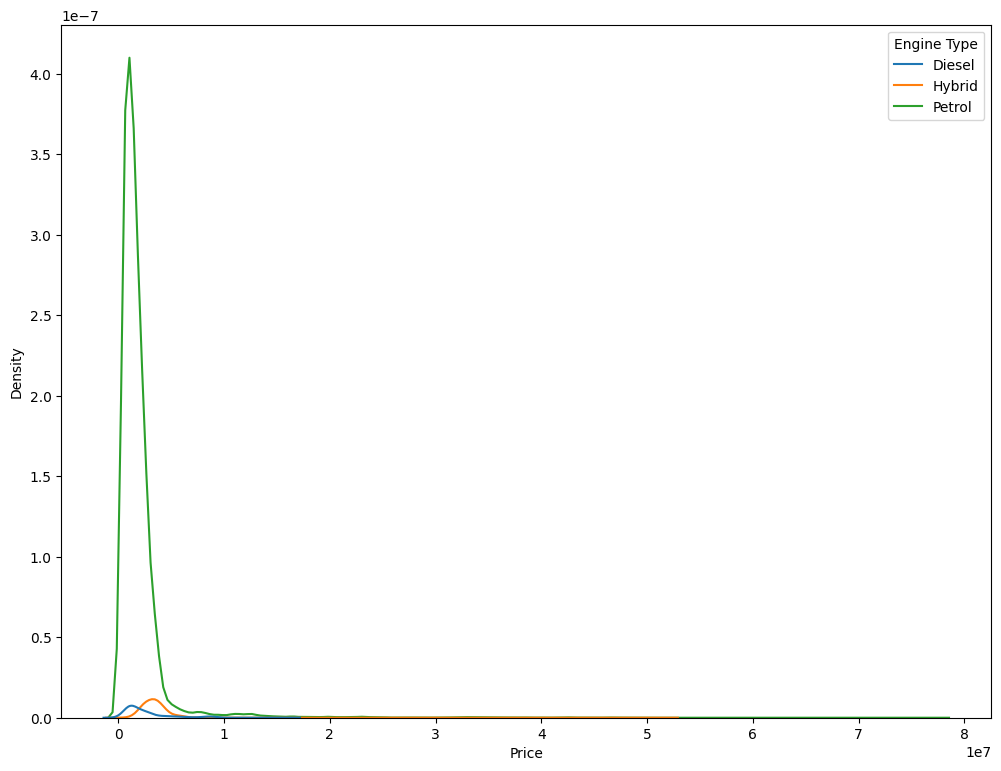

In [137]:
fig, ax = plt.subplots(figsize = (12,9))
ax = sns.kdeplot(data = df, x = 'Price', hue = 'Engine Type')

In [139]:
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [159]:
new = df.groupby('Company Name').agg(mean_cn= ('Price', 'mean'), std_cn= ('Price', 'std'))

In [160]:
df = pd.merge(df, new, on='Company Name')
df.head(10)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status,mean_cn,std_cn
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered,2.995425e+06,4.022317e+06
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered,2.995425e+06,4.022317e+06
2,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered,2.995425e+06,4.022317e+06
3,Toyota,Prado,2650000,1998,Punjab,110000,Diesel,3000,Beige,Imported,SUV,Automatic,Registered,2.995425e+06,4.022317e+06
4,Toyota,Corolla,2750000,2018,Punjab,51240,Petrol,1300,White,Local,Sedan,Automatic,Registered,2.995425e+06,4.022317e+06
5,Toyota,Fortuner,8650000,2018,Punjab,35000,Diesel,2800,White,Local,SUV,Automatic,Registered,2.995425e+06,4.022317e+06
6,Toyota,Vitz,965000,2001,Punjab,135000,Petrol,1000,Pink,Imported,Hatchback,Automatic,Registered,2.995425e+06,4.022317e+06
7,Toyota,Corolla,2445000,2016,Punjab,96000,Petrol,1600,Black,Local,Sedan,Automatic,Registered,2.995425e+06,4.022317e+06
8,Toyota,Corolla,1360000,2011,Punjab,125000,Petrol,1300,White,Local,Sedan,Manual,Registered,2.995425e+06,4.022317e+06
9,Toyota,Corolla,3785000,2019,Punjab,24000,Petrol,1798,Assembly,Local,Sedan,Automatic,Registered,2.995425e+06,4.022317e+06


In [175]:
print(df.loc[15550:15570,:])

      Company Name Model Name    Price  Model Year   Location  Mileage  \
15550       Toyota    Corolla  2750000        2018     Punjab    16000   
15551       Toyota    Corolla  1680000        2012      Sindh    28000   
15552       Toyota      Passo  1725000        2013  Islamabad    89000   
15553       Toyota      Prius  1650000        2007      Sindh   118000   
15554       Toyota      Prado  5500000        2006        KPK   103269   
15555       Toyota    Corolla  1950000        2012     Punjab    89000   
15556       Toyota       Aqua  2600000        2015        KPK    60000   
15557       Toyota       Aqua  2450000        2015     Punjab    52000   
15558       Toyota       Aqua  3000000        2016     Punjab    60000   
15559       Toyota    Corolla  2250000        2015     Punjab    77000   
15560       Suzuki       Alto  1530000        2019        KPK    17500   
15561       Suzuki       Alto  1650000        2019     Punjab     9600   
15562       Suzuki      Wagon  1440000

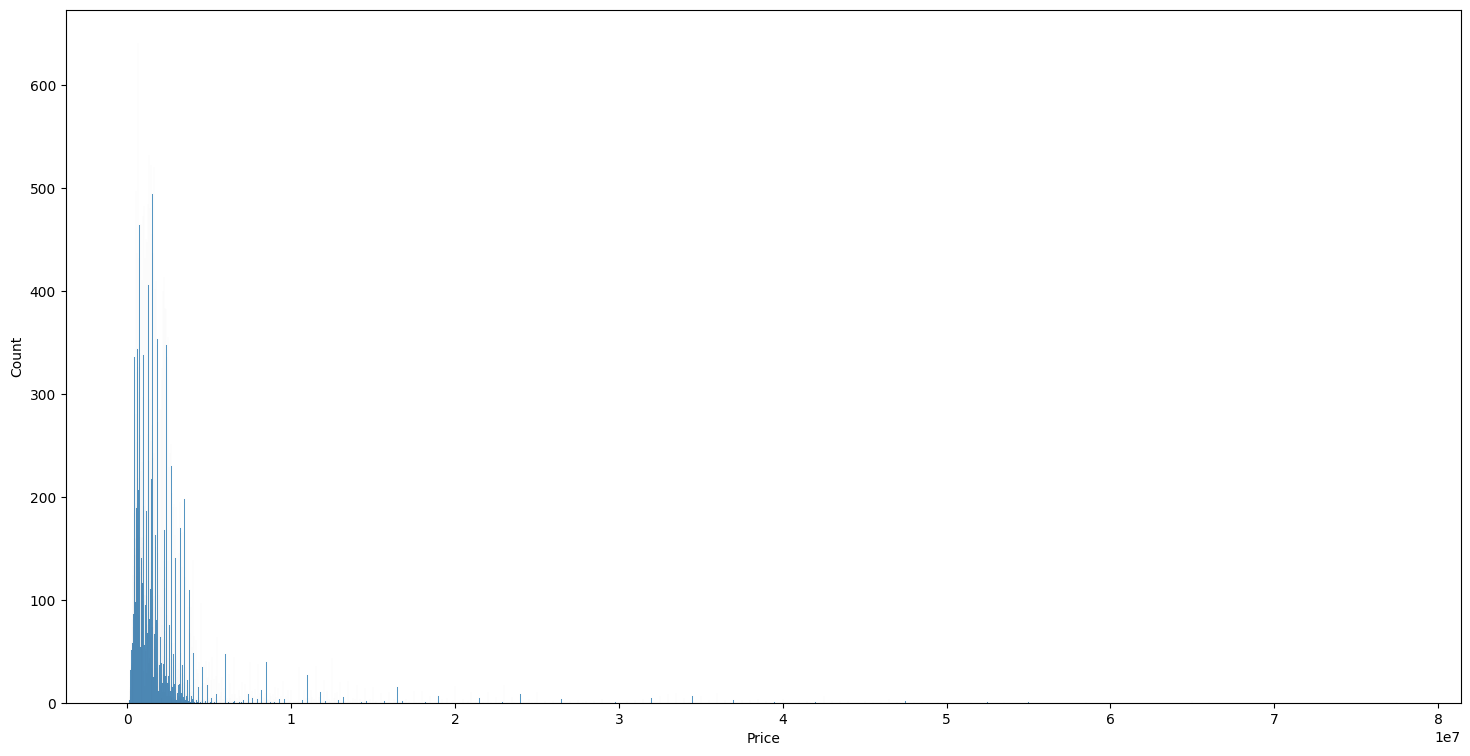

In [178]:
fig, ax = plt.subplots(figsize = (18,9))
ax = sns.histplot(data = df, x = 'Price', binwidth = 10000)

In [180]:
df.pivot_table(values = 'Price', aggfunc = 'median', index = 'Engine Type', columns = 'Body Type')

Body Type,Cross Over,Hatchback,Mini Van,SUV,Sedan,Van
Engine Type,,,,,,
Diesel,NaN,890000.0,1890000.0,2600000.0,1050000.0,2000000.0
Hybrid,3900000.0,2555000.0,2775000.0,8000000.0,3150000.0,3250000.0
Petrol,3900000.0,1015000.0,900000.0,6500000.0,1920000.0,920000.0


In [185]:
pd.crosstab(df['Engine Type'], df['Body Type'], df['Price'], aggfunc = 'median')

Body Type,Cross Over,Hatchback,Mini Van,SUV,Sedan,Van
Engine Type,,,,,,
Diesel,NaN,890000.0,1890000.0,2600000.0,1050000.0,2000000.0
Hybrid,3900000.0,2555000.0,2775000.0,8000000.0,3150000.0,3250000.0
Petrol,3900000.0,1015000.0,900000.0,6500000.0,1920000.0,920000.0


In [188]:
df['Body Type'].value_counts()

Body Type
Hatchback     21576
Sedan         18984
SUV            2390
Mini Van       1199
Cross Over     1182
Van             691
Name: count, dtype: int64

<Axes: xlabel='Body Type', ylabel='count'>

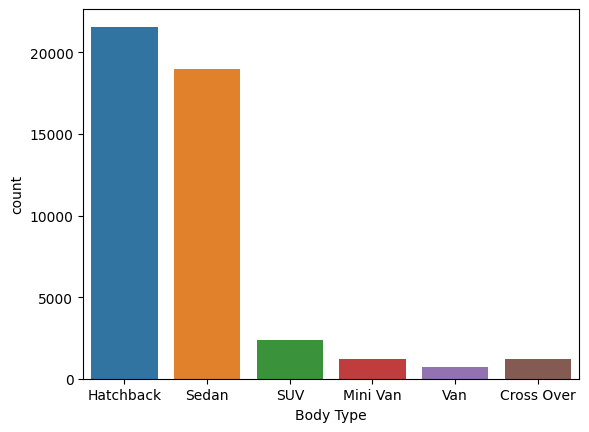

In [189]:
sns.countplot(data = df, x='Body Type')

In [63]:
df.loc[12]

manufacturer_name          Subaru
model_name               Forester
transmission           mechanical
color                       other
odometer_value             321000
year_produced                2002
engine_fuel              gasoline
engine_has_gas              False
engine_type              gasoline
engine_capacity               2.0
body_type                     suv
has_warranty                False
state                       owned
drivetrain                    all
price_usd                  4300.0
is_exchangeable             False
location_region      Минская обл.
number_of_photos               13
up_counter                      2
feature_0                   False
feature_1                    True
feature_2                   False
feature_3                   False
feature_4                   False
feature_5                   False
feature_6                   False
feature_7                   False
feature_8                   False
feature_9                   False
duration_liste

In [65]:
df[12:13]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
12,Subaru,Forester,mechanical,other,321000,2002,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,False,2


In [68]:
df.loc[[12]]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
12,Subaru,Forester,mechanical,other,321000,2002,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,False,2
